In [1]:
from PIL import Image
from torchvision import transforms as tfs

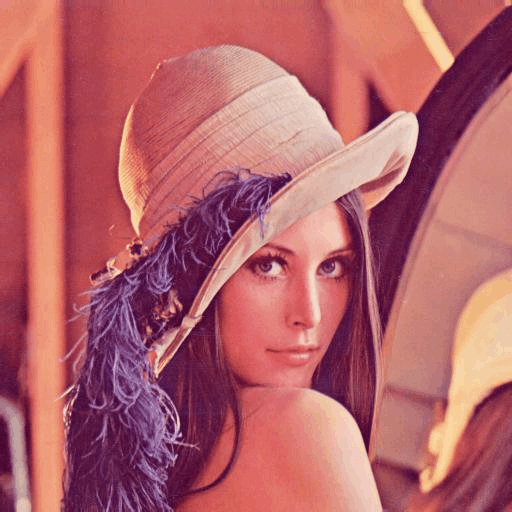

In [3]:
im = Image.open('./lena.jpg')
im

before scale, shape:(512, 512)
after scale, shape:(200, 100)


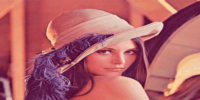

In [7]:
#比例缩放
print('before scale, shape:{}'.format(im.size))
new_im = tfs.Resize((100, 200))(im)
print('after scale, shape:{}'.format(new_im.size))
new_im

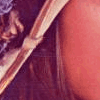

In [8]:
# 随机裁剪出100 x 100的区域
random_im1 = tfs.RandomCrop(100)(im)
random_im1

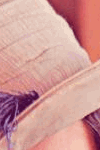

In [9]:
random_im2 = tfs.RandomCrop((150, 100))(im)
random_im2

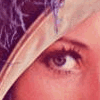

In [17]:
center_im = tfs.CenterCrop(100)(im)
center_im

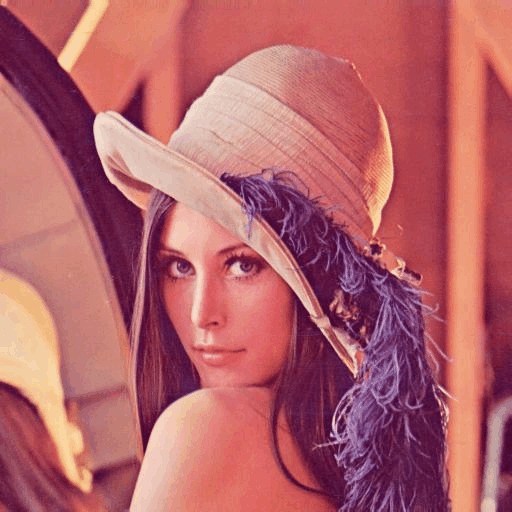

In [18]:
#随机水平翻转
h_flip = tfs.RandomHorizontalFlip()(im)
h_flip

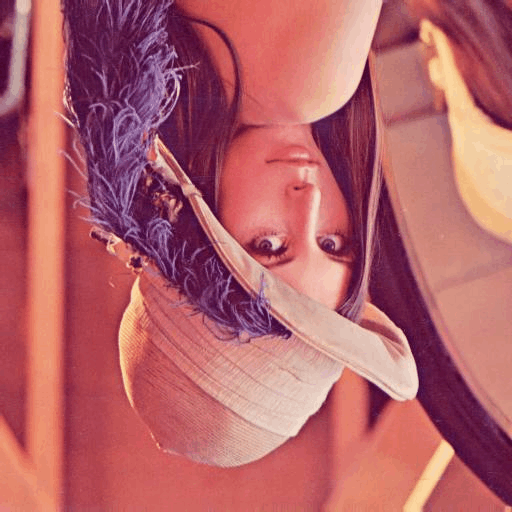

In [25]:
#随机竖直翻转
v_flip = tfs.RandomVerticalFlip()(im)
v_flip

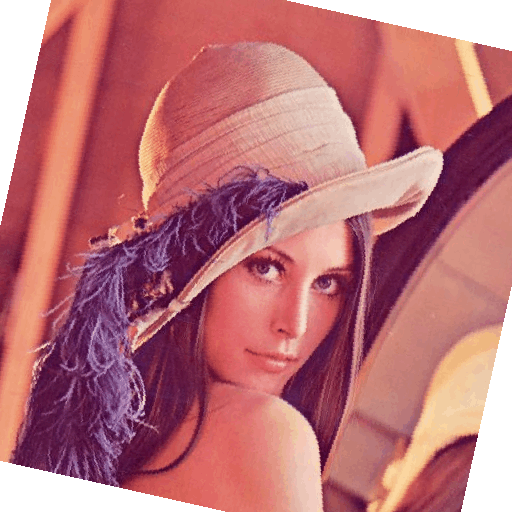

In [26]:
#随机角度旋转
rot_im = tfs.RandomRotation(45)(im)
rot_im

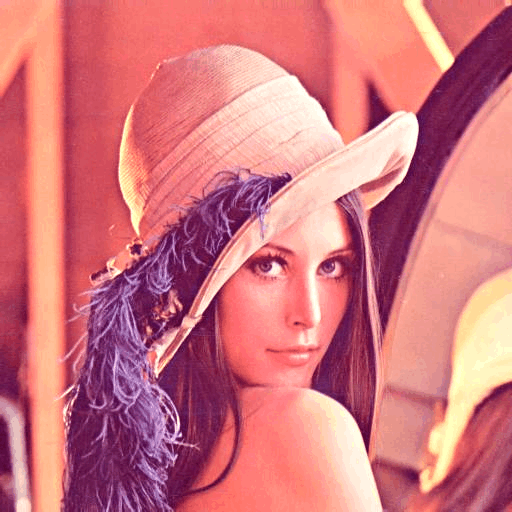

In [39]:
#亮度、对比度、和颜色的变化
bright_im = tfs.ColorJitter(brightness=1)(im)
bright_im

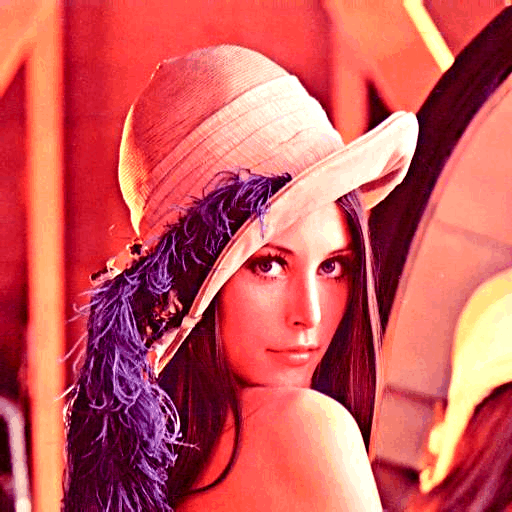

In [45]:
#对比度
contrast_im = tfs.ColorJitter(contrast=1)(im)
contrast_im

In [46]:
#颜色
color_im = tfs.ColorJitter(hue=0.5)(im)#随机从-0.5 - 0.5之间对颜色变化

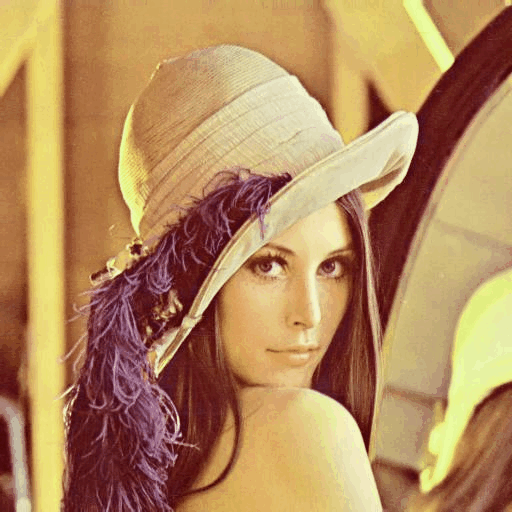

In [47]:
color_im

以上操作都可以联合使用，比如先做随机翻转，然后随机截取，再做对比度增强等等，torchvison里面有个非常方便的函数能够将这些变化合起来，就是torchvison.transforms.Compose(),下面举例

In [48]:
im_aug = tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

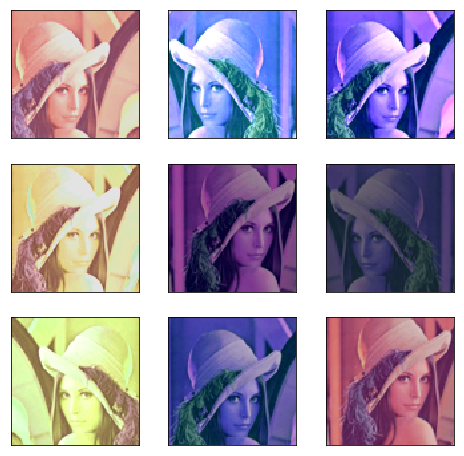

In [53]:
nrows = 3
ncols = 3
figsize = (8, 8)
_,figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

可以看到每次做完增强之后的图片都有一些变化，所以这就是我们前面讲的，增加了一些新数据

下面使用图像增强进行训练网络，看看集体的提升究竟在什么地方，使用前面讲的ResNet进行训练

In [57]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from utils import train,resnet
from torchvision import transforms as tfs

In [58]:
#使用数据增强
def train_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(120),
        tfs.RandomHorizontalFlip(),
        tfs.RandomCrop(96),
        tfs.ColorJitter(brightness=0.5, contrast=0.5,hue=0.5),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x = im_aug(x)
    return x
def test_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('./data', train=True, transform=train_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('./data', train=False, transform=test_tf)
test_data = torch.utils.data.DataLoader(test_set,batch_size=128,shuffle=False)

net = resnet(3,10)
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
criterion=nn.CrossEntropyLoss()

In [ ]:
train(net, train_data, test_data, 10, optimizer, criterion)